<a href="https://colab.research.google.com/github/fealfaraj/llSPS-INT-175-Chronic-kidney-disease-analysis/blob/master/Copy_of_Chronic_Kidney_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Libraries

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing the dataset

In [ ]:
dataset = pd.read_csv("kidney_disease.csv")
dataset

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [ ]:
dataset.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
dataset.isnull().any()

Bp       False
Sg       False
Al       False
Su       False
Rbc      False
Bu       False
Sc       False
Sod      False
Pot      False
Hemo     False
Wbcc     False
Rbcc     False
Htn      False
Class    False
dtype: bool

In [ ]:
dataset.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

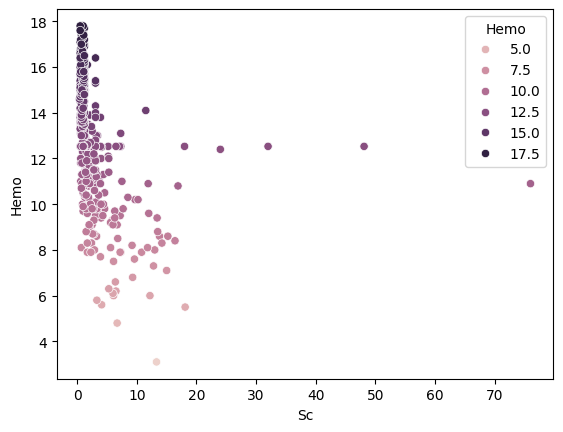

In [ ]:
# prompt: Scatter plot of  Sc over Hemo with different color

import matplotlib.pyplot as plt
sns.scatterplot(x = "Sc", y = "Hemo", hue = "Hemo", data = dataset)
plt.show()


In [ ]:
dataset.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [ ]:
dataset['Al'].value_counts()

Al
0.0    199
1.0     90
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64

In [ ]:
#Data Visualization

# Heat Map

<Axes: >

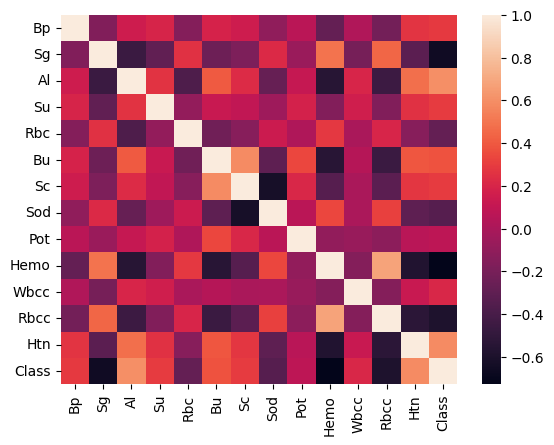

In [ ]:
sns.heatmap(dataset.corr())

# Scatter plot

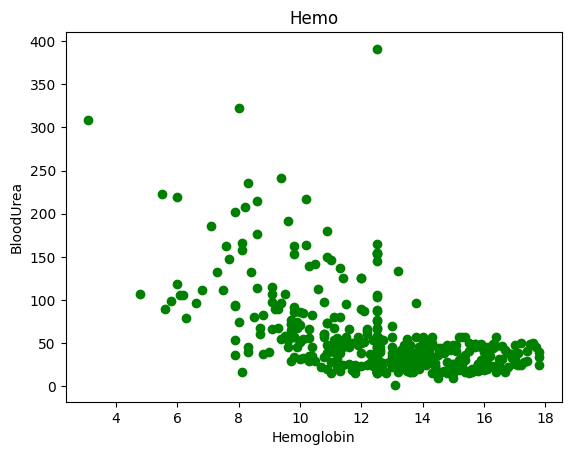

In [ ]:


plt.scatter(dataset['Hemo'],dataset['Bu'],color='g')
plt.xlabel("Hemoglobin")
plt.ylabel("BloodUrea")
plt.title("Hemo")
plt.show()

# Pair plots

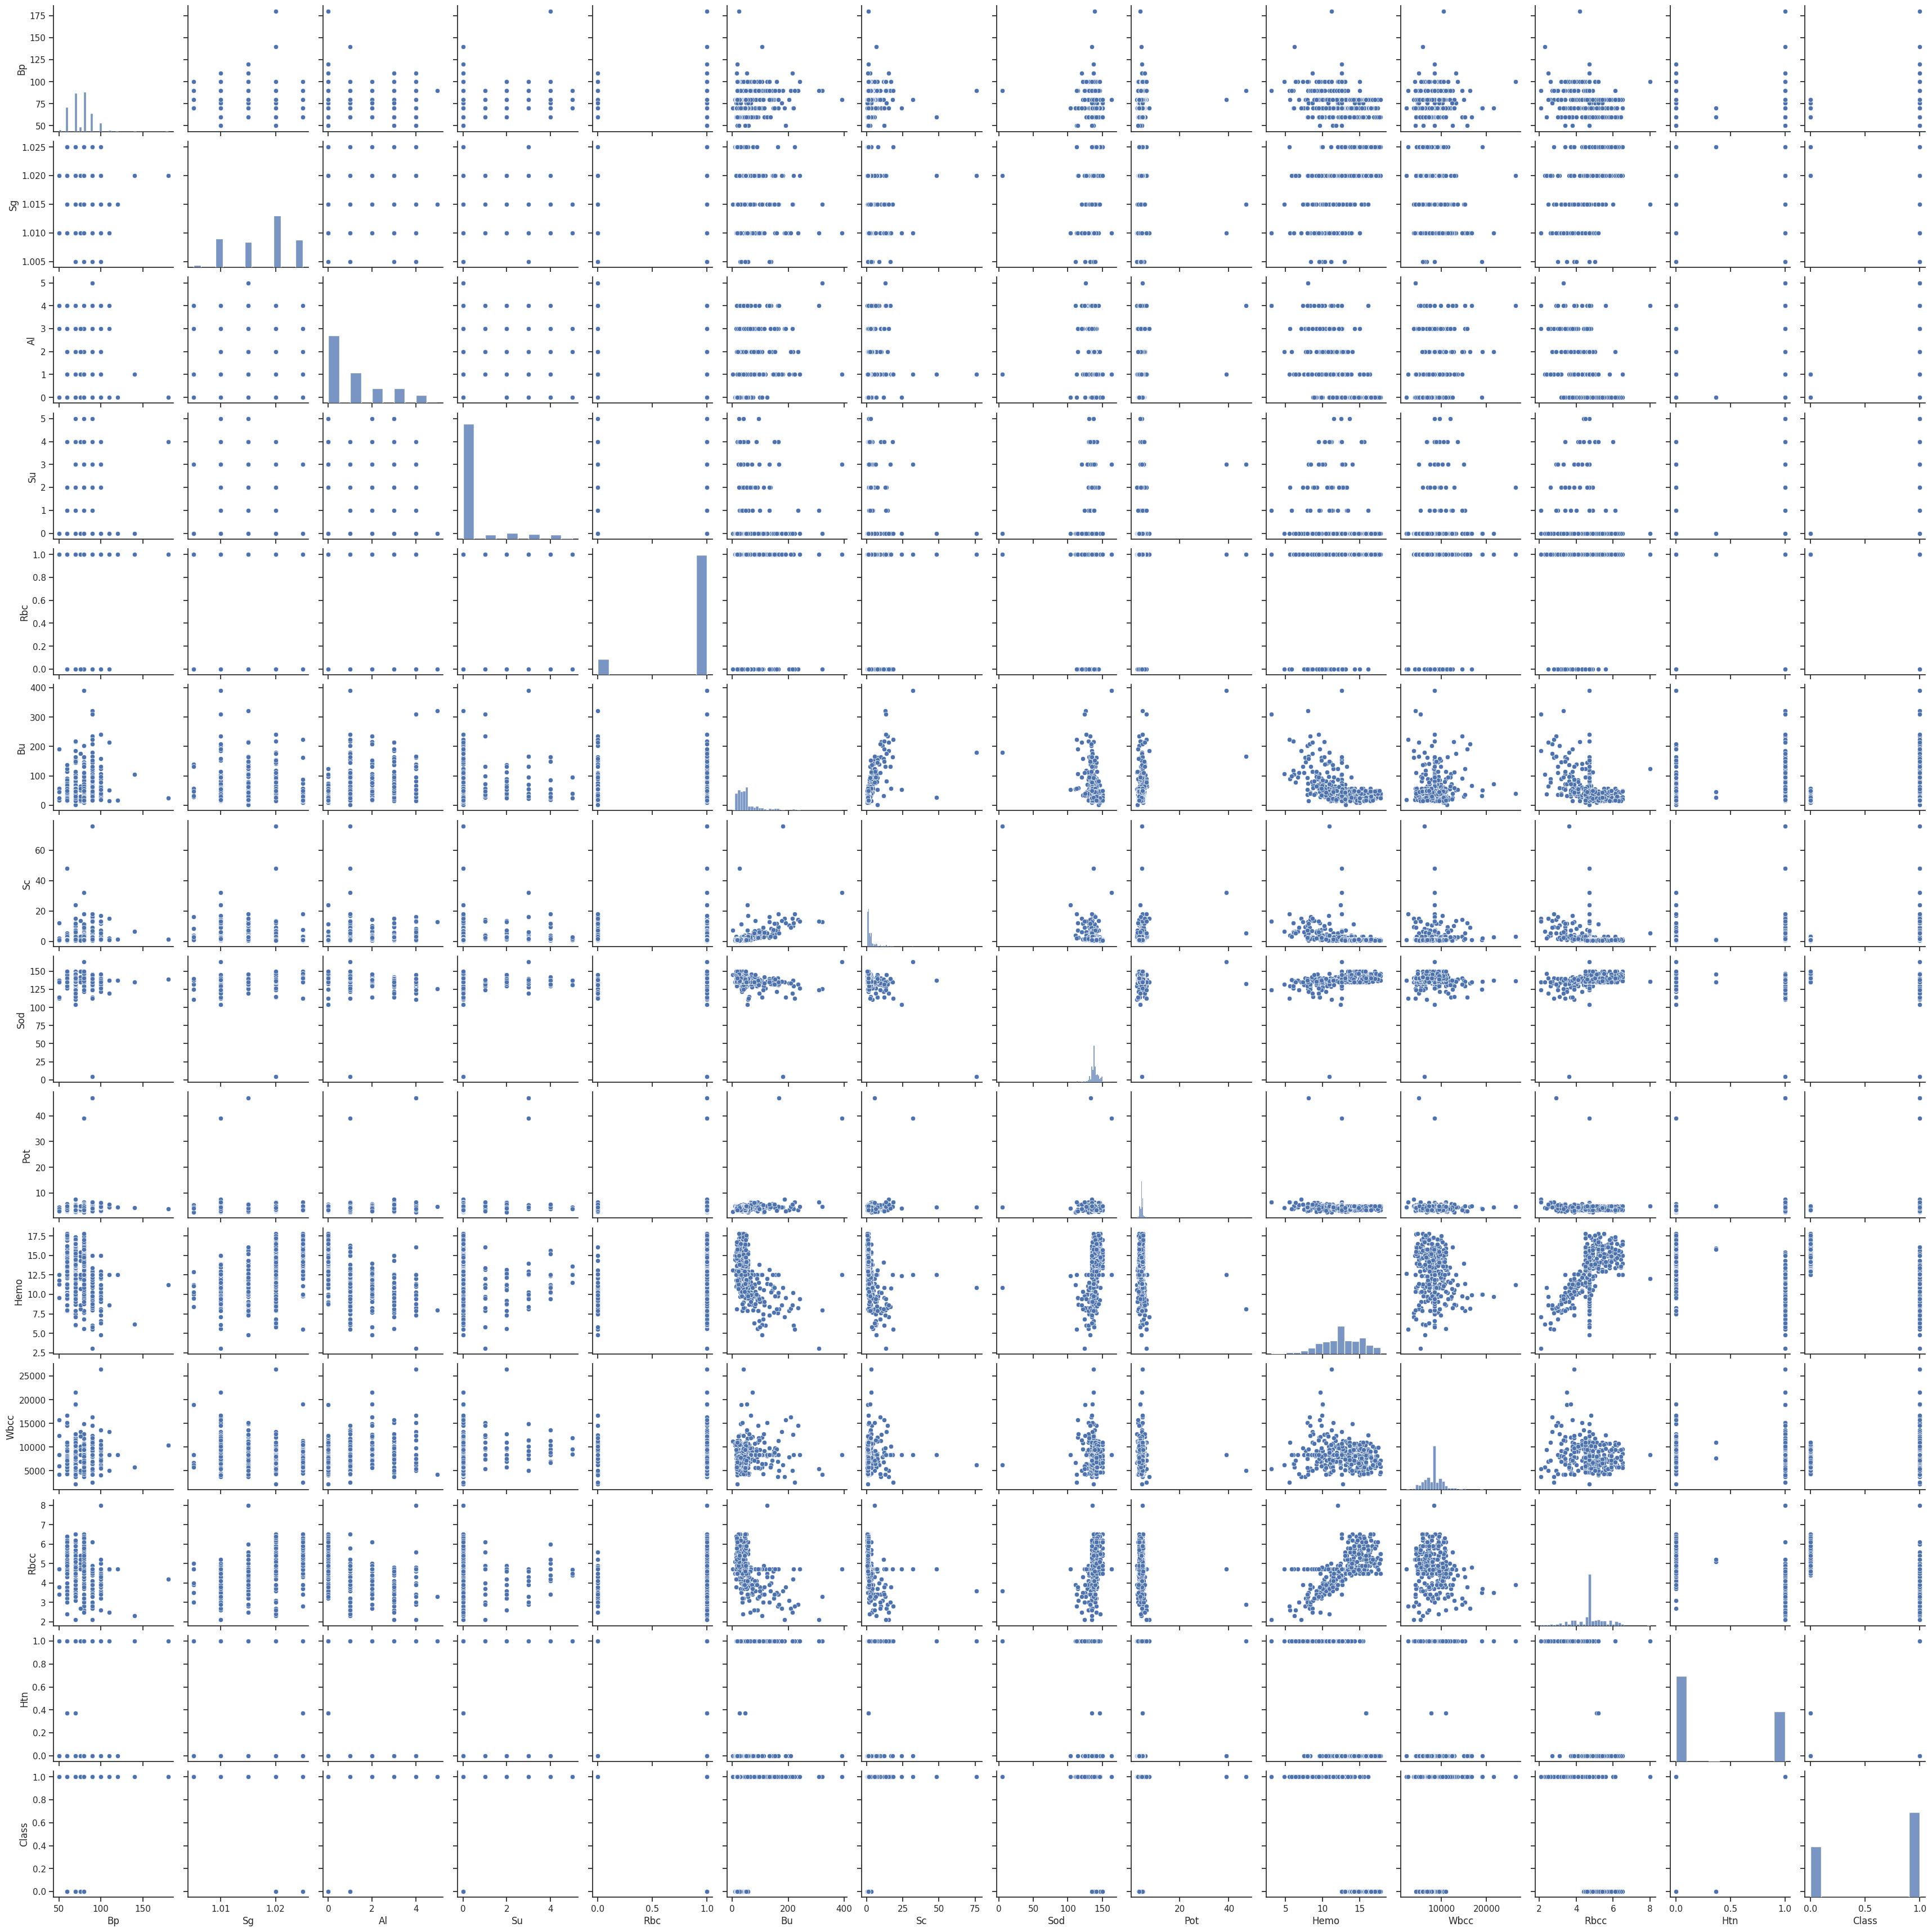

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset)

# Box plots

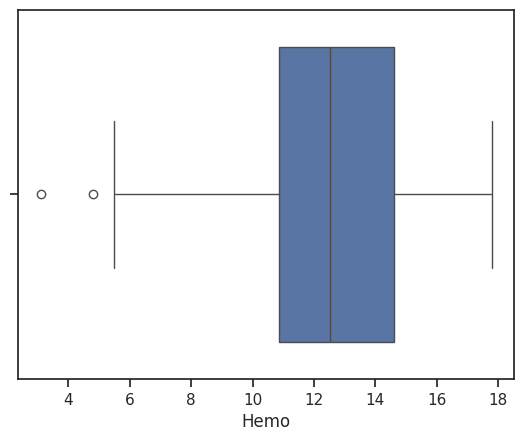

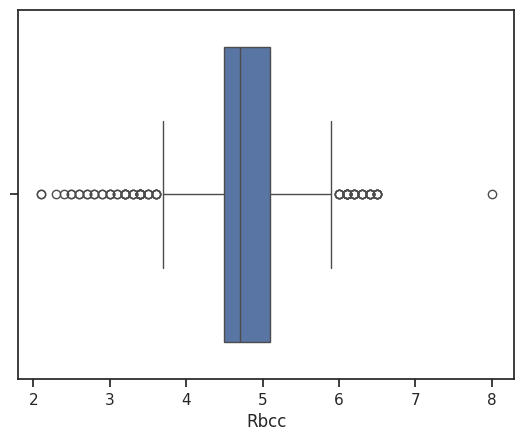

In [ ]:
# prompt: draw box plots Hemo and Rbcc

import matplotlib.pyplot as plt
sns.boxplot(x = dataset["Hemo"])
plt.show()
sns.boxplot(x = dataset["Rbcc"])
plt.show()


Text(0, 0.5, 'Al')

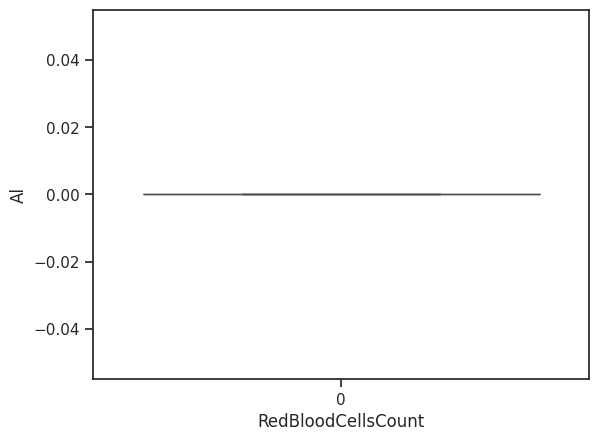

In [ ]:
sns.boxplot(x=dataset['Pot'],y=dataset['Al'])
plt.xlabel("RedBloodCellsCount")
plt.ylabel("Al")

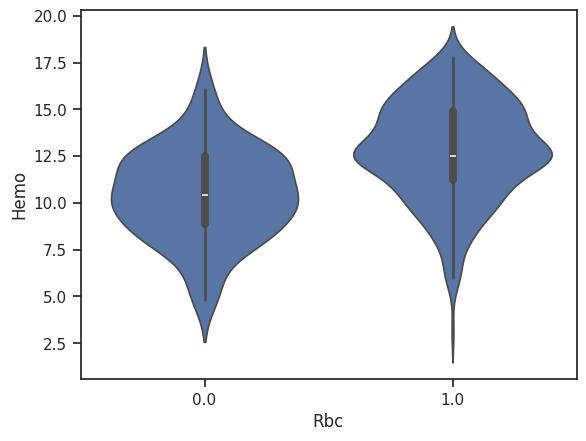

In [ ]:
# prompt:  Violin plots Rbc and Hemo

import matplotlib.pyplot as plt
sns.violinplot(x=dataset["Rbc"], y=dataset["Hemo"])
plt.show()


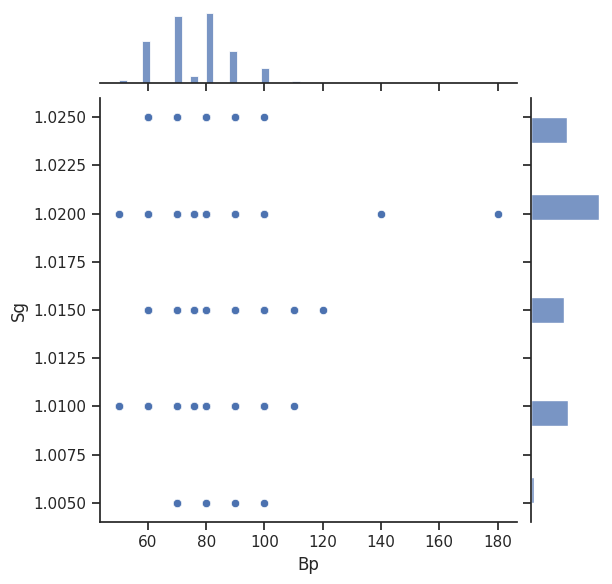

In [ ]:
# prompt: Joint plot Bp and Sg

import matplotlib.pyplot as plt
sns.jointplot(x = "Bp", y = "Sg", data = dataset)
plt.show()


# Bar chart

<BarContainer object of 400 artists>

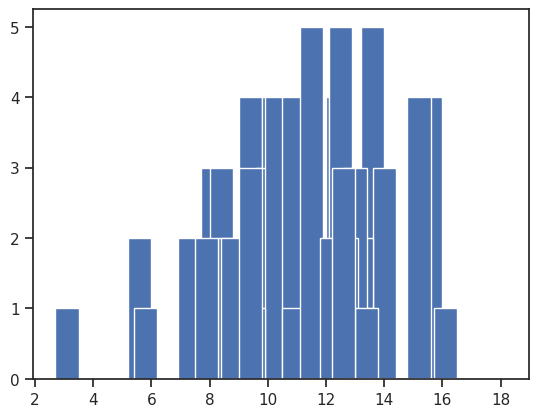

In [ ]:
plt.bar(dataset['Hemo'],dataset['Su'])

# Line plots

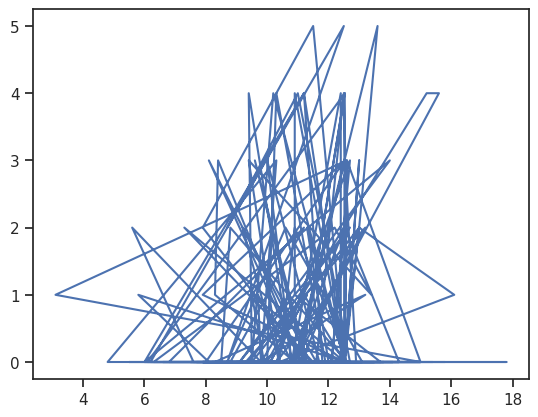

In [ ]:
plt.plot(dataset['Hemo'],dataset['Su'])

In [ ]:
dataset.drop('Sg',axis=1,inplace=True)

In [ ]:
#Taking care of Missing Data

In [ ]:
dataset['Rbc']=dataset['Rbc'].fillna(value=dataset['Rbc'].mode().iloc[0])
dataset

,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [ ]:
dataset.isnull().any()

Sg       False
Al       False
Su       False
Rbc      False
Bu       False
Sc       False
Sod      False
Pot      False
Hemo     False
Wbcc     False
Rbcc     False
Htn      False
Class    False
dtype: bool

In [ ]:
dataset['Al']=dataset['Al'].fillna(value=dataset['Al'].mean())
dataset['Su']=dataset['Su'].fillna(value=dataset['Su'].mean())
dataset['Bu']=dataset['Bu'].fillna(value=dataset['Bu'].mean())
dataset['Sc']=dataset['Sc'].fillna(value=dataset['Sc'].mean())
dataset['Pot']=dataset['Pot'].fillna(value=dataset['Pot'].mean())
dataset['Hemo']=dataset['Hemo'].fillna(value=dataset['Hemo'].mean())

In [ ]:
dataset['Rbc']=dataset['Rbc'].fillna(value=dataset['Rbc'].mode().iloc[0])
dataset['Wbcc']=dataset['Wbcc'].fillna(value=dataset['Wbcc'].mode().iloc[0])
dataset['Rbcc']=dataset['Rbcc'].fillna(value=dataset['Rbcc'].mode().iloc[0])

In [ ]:
dataset.Wbcc=dataset.Wbcc.replace("\t6200",6200)
dataset.Wbcc=dataset.Wbcc.replace("\t8400",8400)
dataset.Wbcc=dataset.Wbcc.replace("\t?",9800)
dataset.Rbc=dataset.Rbc.replace("\t43",43)
dataset.Rbc=dataset.Rbc.replace("\t?",41)
dataset.Rbcc=dataset.Rbcc.replace("\t?",5.2)
dataset['Wbcc'].value_counts()
dataset.Rbc=dataset.Rbc.astype(int)
dataset.Wbcc=dataset.Wbcc.astype(int)
dataset.Rbcc=dataset.Rbcc.astype(float)
dataset['Wbcc'].value_counts()

Wbcc
8406     106
9800      11
6700      10
9600       9
7200       9
        ... 
19100      1
12300      1
16700      1
14900      1
2600       1
Name: count, Length: 90, dtype: int64

In [ ]:
#Label Encoding

In [ ]:
dataset.classification = dataset.classification.replace('ckd\t','ckd')
dataset.classification=[1 if each=="ckd" else 0 for each in dataset.classification]

In [ ]:

dataset.Al = [ 1 if each == "present" else 0 for each in dataset.Al]
dataset.Su = [ 1 if each == "present" else 0 for each in dataset.Su]
dataset.Rbc = [ 1 if each == "present" else 0 for each in dataset.Rbc]
dataset.Bu = [ 1 if each == "present" else 0 for each in dataset.Bu]
dataset.Sc = [ 1 if each == "present" else 0 for each in dataset.Sc]
dataset.Sod = [ 1 if each == "present" else 0 for each in dataset.Sod]
dataset.Pot = [ 1 if each == "present" else 0 for each in dataset.Pot]
dataset.Hemo = [ 1 if each == "present" else 0 for each in dataset.Hemo]
dataset.Wbcc = [ 1 if each == "present" else 0 for each in dataset.Wbcc]
dataset

,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,0,0,0,0,0,0,0,0,0,5.20,1.0,1
1,0,0,0,0,0,0,0,0,0,4.71,0.0,1
2,0,0,0,0,0,0,0,0,0,4.71,0.0,1
3,0,0,0,0,0,0,0,0,0,3.90,1.0,1
4,0,0,0,0,0,0,0,0,0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,4.90,0.0,0
396,0,0,0,0,0,0,0,0,0,6.20,0.0,0
397,0,0,0,0,0,0,0,0,0,5.40,0.0,0
398,0,0,0,0,0,0,0,0,0,5.90,0.0,0


In [ ]:
x=dataset.iloc[:,:14]
x

,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,0,0,0,0,0,0,0,0,0,5.20,1.0,1
1,0,0,0,0,0,0,0,0,0,4.71,0.0,1
2,0,0,0,0,0,0,0,0,0,4.71,0.0,1
3,0,0,0,0,0,0,0,0,0,3.90,1.0,1
4,0,0,0,0,0,0,0,0,0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,4.90,0.0,0
396,0,0,0,0,0,0,0,0,0,6.20,0.0,0
397,0,0,0,0,0,0,0,0,0,5.40,0.0,0
398,0,0,0,0,0,0,0,0,0,5.90,0.0,0


In [ ]:
y=dataset.iloc[:,14:]
y

""
0
1
2
3
4
...
395
396
397
398


In [ ]:
#Splitting Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train.iloc[:,1:]

,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
39,0,0,0,0,0,0,0,0,4.20,1.0,1
167,0,0,0,0,0,0,0,0,4.71,0.0,1
383,0,0,0,0,0,0,0,0,5.00,0.0,0
221,0,0,0,0,0,0,0,0,4.71,1.0,1
351,0,0,0,0,0,0,0,0,4.70,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,0,0,0,0,0,6.30,0.0,0
72,0,0,0,0,0,0,0,0,4.71,1.0,1
396,0,0,0,0,0,0,0,0,6.20,0.0,0
235,0,0,0,0,0,0,0,0,4.71,0.0,1


In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)
from joblib import dump
dump(sc,"scalarapp.save")

['scalarapp.save']

In [ ]:
#Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dt.fit(x_train,y_train)


import pickle
pickle.dump(dt,open('decisionapp.pkl','Wb'))
y_predict=dt.predict(x_test)
y_predict

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [ ]:
#Evaluation

In [ ]:
# prompt: ada bosst classifier\

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = ada.fit(x_train, y_train)
y_pred_ada = model.predict(x_test)


# Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

In [ ]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN =cm[1, 0]
r=(TP + TN) / float(TP + TN + FP + FN)
r

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

# AUC - ROC Curve

In [ ]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

In [ ]:
plt.title('Receiver operating characterists')
plt.plot(fpr,tpr,'B',label='AUC=%0.2f'%roc_auc)
plt.plot